 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
#Reading whale returns
csvpath1 = Path("Resources/whale_returns.csv")


In [3]:
#Use the file path to read the CSV into a DataFrame

whale_returns_df = pd.read_csv(csvpath1, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Count null
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
#Checking for nulls again
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
csvpath2 = Path("Resources/algo_returns.csv")


In [8]:
#Use the file path to read the CSV into a DataFrame
algo_returns_df = pd.read_csv(csvpath2, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
#Count null
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
#Checking for nulls again
algo_returns_df .isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices

csvpath3 = Path("Resources/sp500_history.csv")

In [13]:
#Use the file path to read the CSV into a DataFrame
sp500_history_df = pd.read_csv(csvpath3, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()



,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [15]:
#Clean identified numeric fields with $ symbol
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [16]:
# Fix Data Types and Convert `Close` from `object` to `float`
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

In [17]:
# Confirm conversion worked as expected
sp500_history_df.dtypes

Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [19]:
#Count null
sp500_history_df.isnull().sum()

Close    1
dtype: int64

In [20]:
# Drop nulls
sp500_history_df = sp500_history_df.dropna().copy()
sp500_history_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [22]:
#Rename CLose column to S&P 500
sp500_history_df = sp500_history_df.rename(columns= {"Close":"S&P500"})
print(sp500_history_df)

              S&P500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Concatenate all DataFrames into a single DataFrame

portfolio_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')
portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

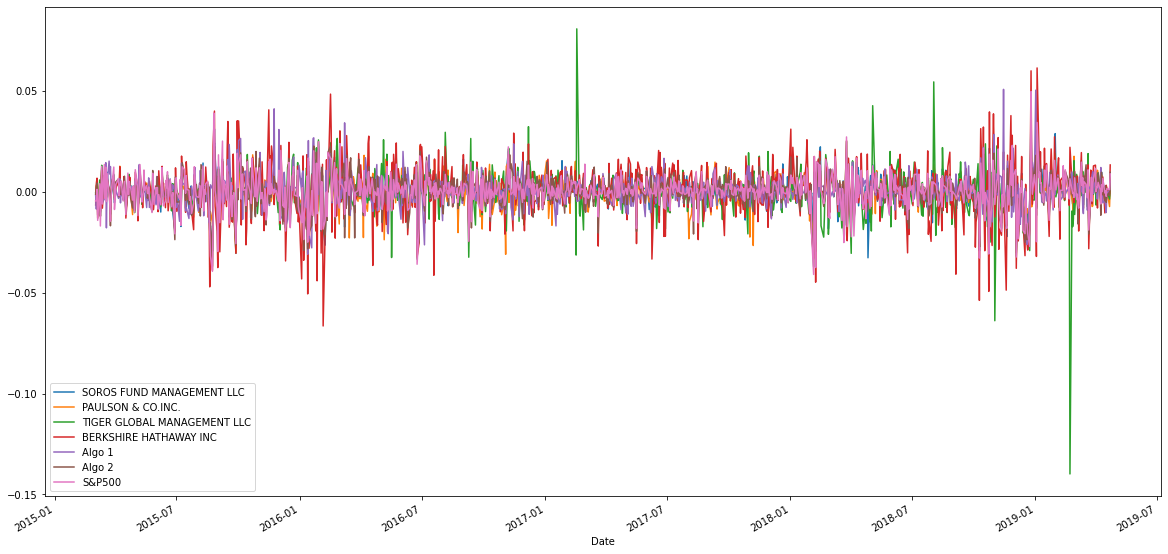

In [24]:
# Plot daily returns
daily_returns = portfolio_df.pct_change()
portfolio_df.plot(figsize=(20,10))

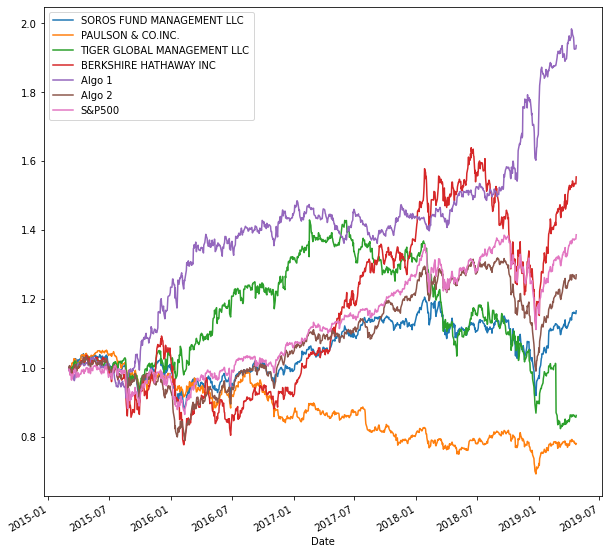

In [25]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_df).cumprod()
cumulative_returns.plot(figsize=(10,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

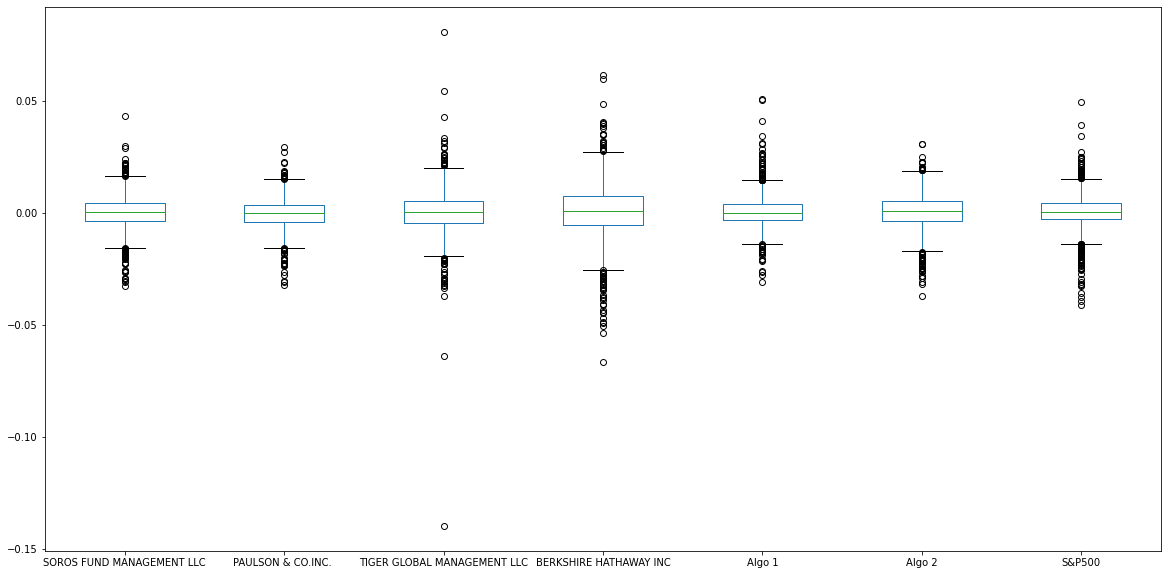

In [26]:
# Box plot to visually show risk
portfolio_df.plot.box(figsize=(20, 10))

In [27]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = daily_returns.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
TIGER GLOBAL MANAGEMENT LLC          NaN
BERKSHIRE HATHAWAY INC               NaN
Algo 1                         15.710988
dtype: float64

In [28]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

Algo 2                         682.184701
Algo 1                          15.710988
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
dtype: float64

In [29]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Algo 2                         10829.346406
Algo 1                           249.404199
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

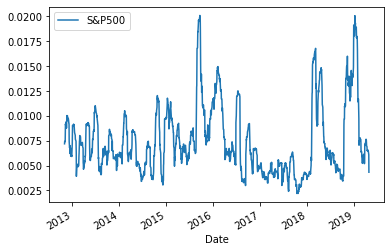

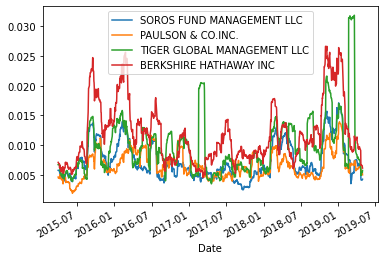

In [30]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_history_df.rolling(window=21).std().plot()
whale_returns_df.rolling(window=21).std().plot()

In [31]:
# Construct a correlation table
correlation = portfolio_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [32]:
#show Daily returns columns
daily_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')

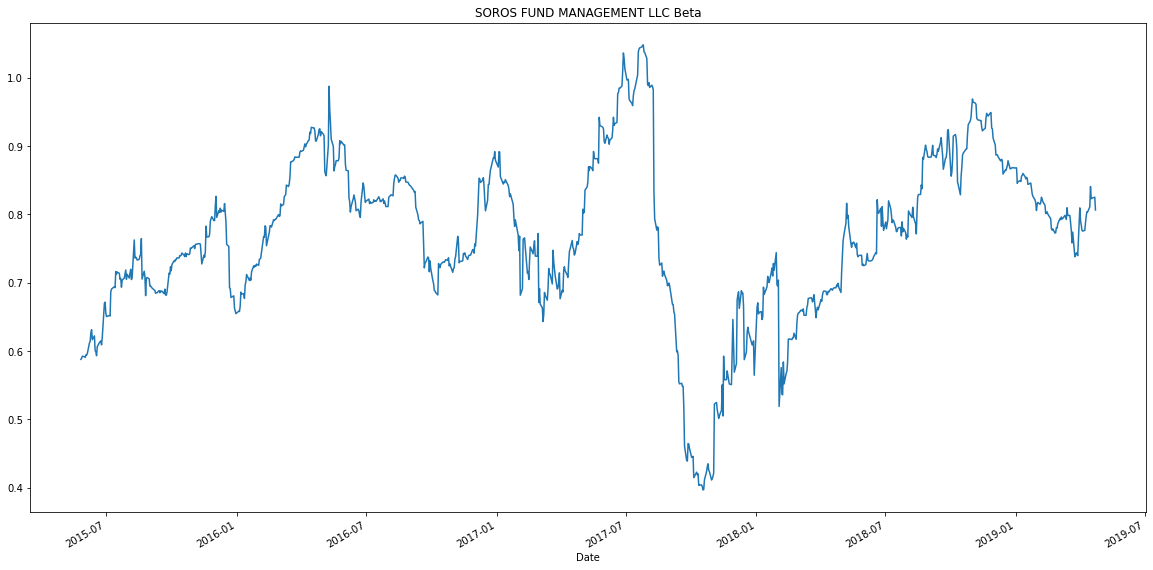

In [33]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = portfolio_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(portfolio_df['S&P500'])
rolling_variance = portfolio_df['S&P500'].rolling(60).var()
(rolling_covariance / rolling_variance).plot(figsize=(20, 10), title='SOROS FUND MANAGEMENT LLC Beta')
                                    

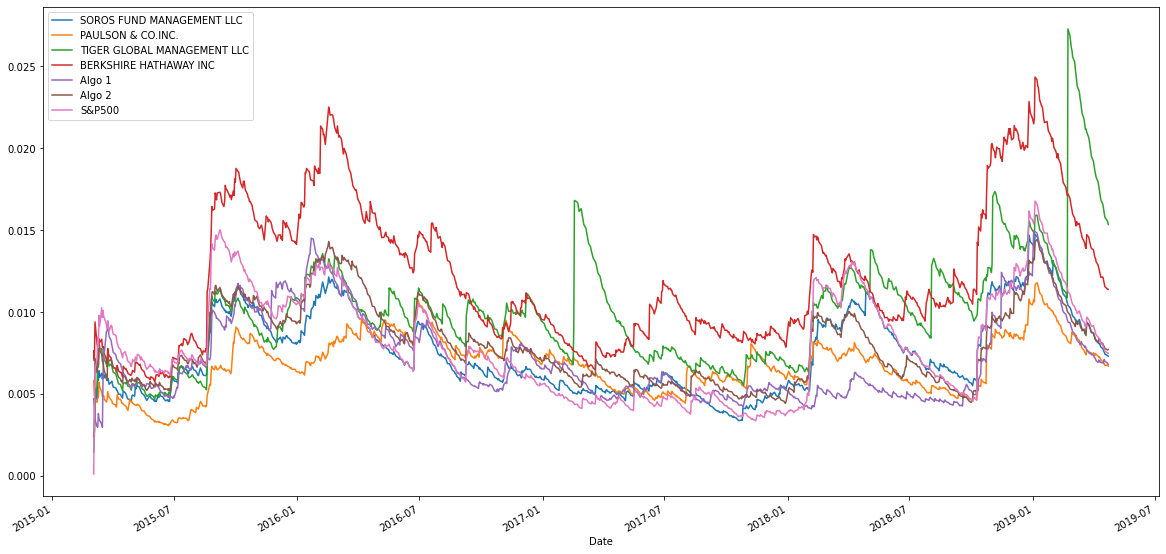

In [34]:
# Calculate a rolling window using the exponentially weighted moving average. 


portfolio_df.ewm(halflife=21).std().plot(figsize=(20, 10)) 

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [35]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (portfolio_df.mean() * 252) / (portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

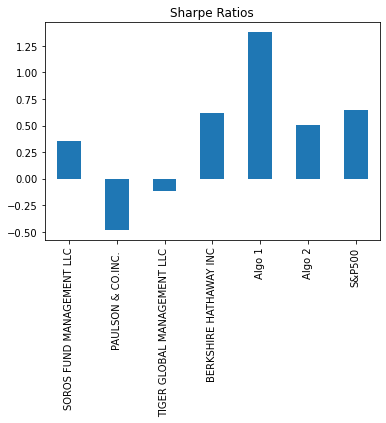

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [37]:
#On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Yes, Algo Portfolio outperformed other 2 portfolios (Whale and S&P500)

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Read the first stock
csvpath4 = Path("Resources/aapl_historical.csv")

In [39]:
# Use the file path to read the CSV into a DataFrame 
apple_df = pd.read_csv(csvpath4, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [40]:
# Read the second stock
csvpath5 = Path("Resources/cost_historical.csv")

In [41]:
# Use the file path to read the CSV into a DataFrame 
costco_df = pd.read_csv(csvpath5, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [42]:
# Read the third stock
csvpath6 = Path("Resources/goog_historical.csv")

In [43]:
# Use the file path to read the CSV into a DataFrame 
google_df = pd.read_csv(csvpath6, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [44]:
# Concatenate all stocks into a single DataFrame
portfolio2_df = pd.concat([apple_df, costco_df, google_df], axis='rows', join='inner')
portfolio2_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [45]:
# Reset the index
portfolio2_df.reset_index()
portfolio2_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [46]:
# Pivot so that each column of prices represents a unique symbol

portfolio2_df = portfolio2_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio2_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [47]:
# Drop Nulls
portfolio2_df.isnull()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,False,False,False
2018-05-14,False,False,False
2018-05-15,False,False,False
2018-05-16,False,False,False
2018-05-17,False,False,False
...,...,...,...
2019-05-03,False,False,False
2019-05-06,False,False,False
2019-05-07,False,False,False


In [48]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
portfolio2_df.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio2_df = portfolio2_df.dot(weights)
portfolio2_df.head()

Trade DATE
2018-05-11    494.203333
2018-05-14    494.743333
2018-05-15    487.050000
2018-05-16    489.553333
2018-05-17    488.393333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolios_df = pd.concat([portfolio_df , portfolio2_df], axis='columns', join='inner')
combined_portfolios_df 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,494.203333
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,494.743333
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,487.050000
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,489.553333
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,488.393333
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,557.240000
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,561.676667
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,562.013333
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,565.596667


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_df = combined_portfolios_df.dropna()
combined_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,494.203333
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,494.743333
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,487.050000
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,489.553333
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,488.393333
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,557.240000
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,561.676667
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,562.013333
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,565.596667


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

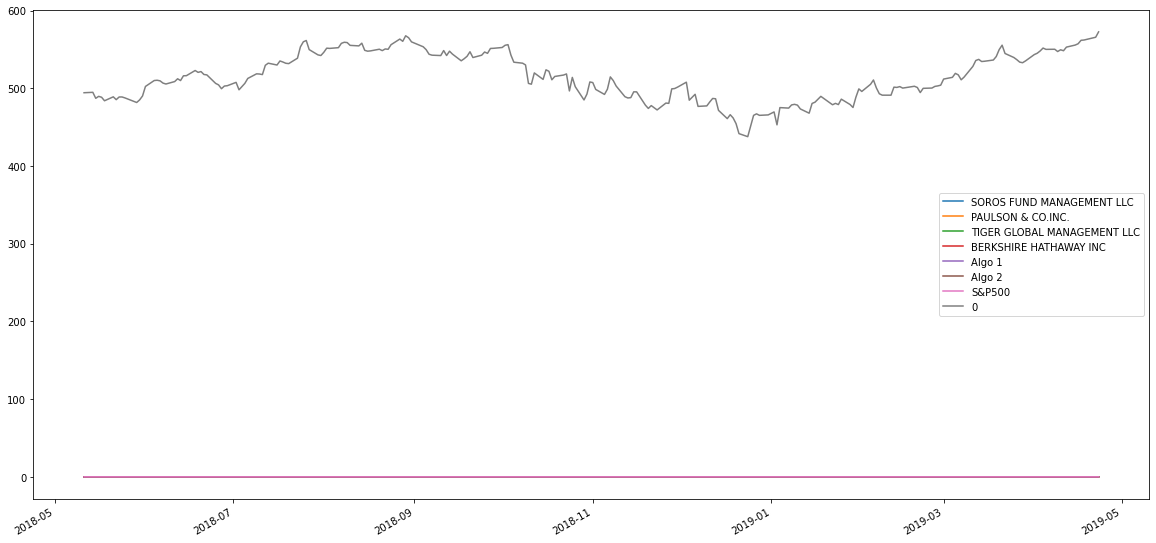

In [52]:
#Daily returns calculation for combined portfolio
combined_daily_returns = combined_portfolios_df.pct_change()
combined_portfolios_df.plot(figsize=(20,10))

In [53]:
# Risk
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_daily_std = combined_daily_returns.std()
combined_daily_std.head()

SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
TIGER GLOBAL MANAGEMENT LLC          NaN
BERKSHIRE HATHAWAY INC               NaN
Algo 1                         11.021018
dtype: float64

In [54]:
# Determine which portfolios are riskier than the S&P 500
combined_daily_std = combined_daily_std.sort_values(ascending=False)
combined_daily_std.head()

Algo 2                       1360.011676
S&P500                         39.992116
Algo 1                         11.021018
0                               0.014413
SOROS FUND MANAGEMENT LLC            NaN
dtype: float64

In [55]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_daily_std * np.sqrt(252)
combined_annualized_std.head()

Algo 2                       21589.516048
S&P500                         634.855162
Algo 1                         174.953232
0                                0.228804
SOROS FUND MANAGEMENT LLC             NaN
dtype: float64

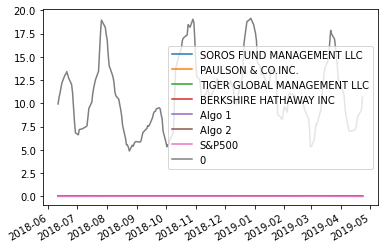

In [56]:
#Rolling
# Calculate and plot the rolling standard deviation using a 21 trading day window
combined_portfolios_df.rolling(window=21).std().plot()


In [57]:
# Calculate annualized Sharpe Ratios
combined_sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC        0.395449
PAULSON & CO.INC.                0.267115
TIGER GLOBAL MANAGEMENT LLC     -1.019946
BERKSHIRE HATHAWAY INC           0.141691
Algo 1                           2.034208
Algo 2                           0.082577
S&P500                           0.595486
0                              275.089213
dtype: float64

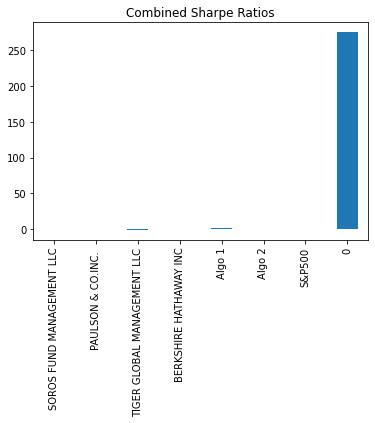

In [59]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind="bar", title="Combined Sharpe Ratios")

In [60]:
# Construct a correlation table
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089,0.085451
PAULSON & CO.INC.,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696,0.107337
TIGER GLOBAL MANAGEMENT LLC,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095,0.084929
BERKSHIRE HATHAWAY INC,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968,0.030419
Algo 1,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290,-0.050034
Algo 2,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699,0.090054
S&P500,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000,0.143339
0,0.085451,0.107337,0.084929,0.030419,-0.050034,0.090054,0.143339,1.000000


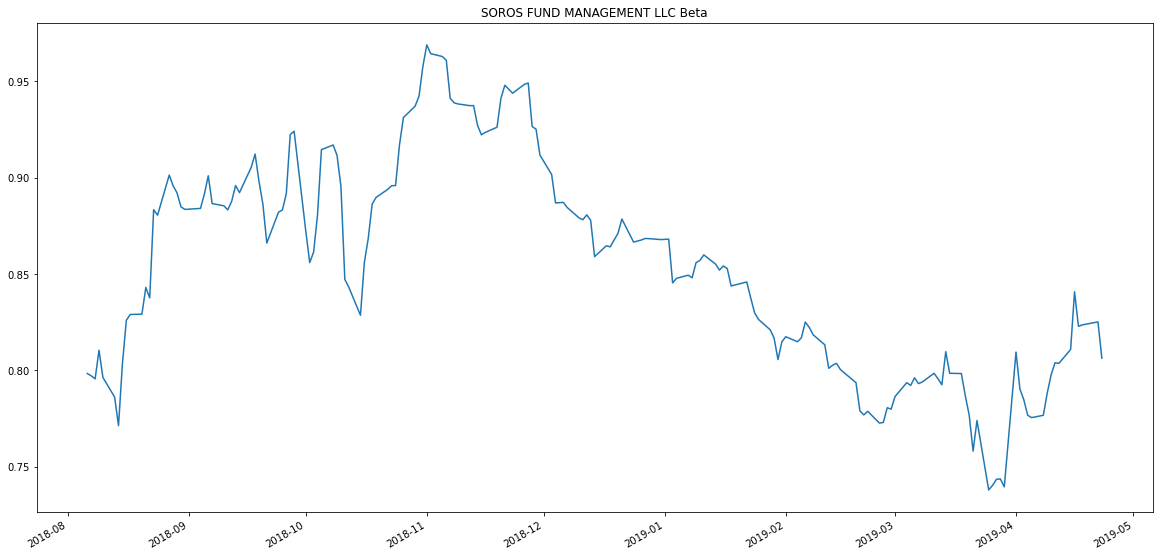

In [61]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = combined_portfolios_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_portfolios_df['S&P500'])
rolling_variance = combined_portfolios_df['S&P500'].rolling(60).var()
(rolling_covariance / rolling_variance).plot(figsize=(20, 10), title='SOROS FUND MANAGEMENT LLC Beta')
                                    